In [2]:
#Jeg importerer nødvendige biblioteker
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import requests
from datetime import datetime, timedelta

In [5]:

# Bestemmer start dato
start_dato = datetime(2025, 9, 26)

# Vi setter slutt dato til i går
slutt_dato = datetime.now() - timedelta(days=1)

# Dato områder
omrader = ["NO1", "NO2", "NO3", "NO4", "NO5"]

#Oppretter en tom liste for alle dataer
fullData_liste = []

print("Data trekkes. Det kan ta litt tid...")


# iterasjon for start og slutt dato
for dato in pd.date_range(start_dato, slutt_dato):

    # Iterasjon for alle områder
    for omrade in omrader:

        # Formaterer datoen
        aar = dato.strftime("%Y")
        maaned = dato.strftime("%m")
        dag = dato.strftime("%d")
        url = f"https://www.hvakosterstrommen.no/api/v1/prices/{aar}/{maaned}-{dag}_{omrade}.json"
        
        # Får data fra URL
        response = requests.get(url, verify=False)
        
    
        if response.status_code == 200:
            # Endrer JSON til liste
            dagligData = response.json()
            
            # Vi legger tid tilhører hvilken område
            for timeData in dagligData:

                timeData['area'] = omrade
            
            # Vi legger dagligData i fullData_liste
            fullData_liste.extend(dagligData)

# Vi oppretter dataframe
df = pd.DataFrame(fullData_liste)

# Lagre DataFrame til en CSV-fil med et nytt, beskrivende navn
filnavn = "strompriser_2023_til_idag.csv"
df.to_csv(filnavn, index=False)

# Viser informasjon om dataene
print("\nData ble hentet")
print(f"Totalt {len(df)} data hentet.")
print("\nDe første 5 radene er:")
print(df.head())

#Navnet på kolonnene
print("\nKolonnenavnene er:")
print(df.columns)

Data trekkes. Det kan ta litt tid...


c:\Users\bekir\AppData\Local\Programs\Python\Python313\Lib\site-packages\urllib3\connectionpool.py:1097: InsecureRequestWarning: Unverified HTTPS request is being made to host 'www.hvakosterstrommen.no'. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/latest/advanced-usage.html#tls-warnings
  warnings.warn(
c:\Users\bekir\AppData\Local\Programs\Python\Python313\Lib\site-packages\urllib3\connectionpool.py:1097: InsecureRequestWarning: Unverified HTTPS request is being made to host 'www.hvakosterstrommen.no'. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/latest/advanced-usage.html#tls-warnings
  warnings.warn(
c:\Users\bekir\AppData\Local\Programs\Python\Python313\Lib\site-packages\urllib3\connectionpool.py:1097: InsecureRequestWarning: Unverified HTTPS request is being made to host 'www.hvakosterstrommen.no'. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/e


Data ble hentet
Totalt 360 data hentet.

De første 5 radene er:
   NOK_per_kWh  EUR_per_kWh     EXR                 time_start  \
0      0.74803      0.06400  11.688  2025-09-26T00:00:00+02:00   
1      0.74569      0.06380  11.688  2025-09-26T01:00:00+02:00   
2      0.74745      0.06395  11.688  2025-09-26T02:00:00+02:00   
3      0.74476      0.06372  11.688  2025-09-26T03:00:00+02:00   
4      0.73997      0.06331  11.688  2025-09-26T04:00:00+02:00   

                    time_end area  
0  2025-09-26T01:00:00+02:00  NO1  
1  2025-09-26T02:00:00+02:00  NO1  
2  2025-09-26T03:00:00+02:00  NO1  
3  2025-09-26T04:00:00+02:00  NO1  
4  2025-09-26T05:00:00+02:00  NO1  

Kolonnenavnene er:
Index(['NOK_per_kWh', 'EUR_per_kWh', 'EXR', 'time_start', 'time_end', 'area'], dtype='object')


In [6]:
# Leser CSV-filen med standard komma-separator
df = pd.read_csv("strompriser_2023_til_idag.csv")

df.to_csv("strompriser_2023_til_idag.csv", sep=';', index=False)

In [7]:
# Vis en oversikt over DataFrame (datatyper og manglende verdier)
print("--- Oversikt over datasettet (df.info()) ---")
print(df.info())

print("\n--- Statistisk sammendrag (df.describe()) ---")
# Viser statistikk for numeriske kolonner (kan hjelpe oss å se outliers)
print(df.describe())

# Sjekk spesifikt for manglende verdier i hver kolonne
print("\n--- Antall manglende verdier per kolonne ---")
print(df.isnull().sum())

--- Oversikt over datasettet (df.info()) ---
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 360 entries, 0 to 359
Data columns (total 6 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   NOK_per_kWh  360 non-null    float64
 1   EUR_per_kWh  360 non-null    float64
 2   EXR          360 non-null    float64
 3   time_start   360 non-null    object 
 4   time_end     360 non-null    object 
 5   area         360 non-null    object 
dtypes: float64(3), object(3)
memory usage: 17.0+ KB
None

--- Statistisk sammendrag (df.describe()) ---
       NOK_per_kWh  EUR_per_kWh         EXR
count   360.000000   360.000000  360.000000
mean      0.495240     0.042347   11.695833
std       0.330090     0.028233    0.010393
min       0.011690     0.001000   11.688000
25%       0.141725     0.012120   11.688000
50%       0.620260     0.053015   11.689000
75%       0.770103     0.065793   11.710500
max       1.250380     0.106980   11.710500

--- Antall ma

In [8]:
df.describe() #Gir en statistisk oversikt over numeriske kolonner i datasettet

,NOK_per_kWh,EUR_per_kWh,EXR
count,360.000000,360.000000,360.000000
mean,0.495240,0.042347,11.695833
std,0.330090,0.028233,0.010393
min,0.011690,0.001000,11.688000
25%,0.141725,0.012120,11.688000
50%,0.620260,0.053015,11.689000
75%,0.770103,0.065793,11.710500
max,1.250380,0.106980,11.710500


In [20]:
#Konverterer 'time_start' til en datotid-datatype
df['time_start'] = pd.to_datetime(df['time_start'], utc=True)
df['time_end'] = pd.to_datetime(df['time_end'], utc=True)

df["Ører_per_kwh"] = df["NOK_per_kWh"] * 100  # Konverterer NOK/kWh til Øre/kWh
df.head()

,NOK_per_kWh,EUR_per_kWh,EXR,time_start,time_end,area,Ører_per_kwh
0,0.74803,0.06400,11.688,2025-09-25 22:00:00+00:00,2025-09-25 23:00:00+00:00,NO1,74.803
1,0.74569,0.06380,11.688,2025-09-25 23:00:00+00:00,2025-09-26 00:00:00+00:00,NO1,74.569
2,0.74745,0.06395,11.688,2025-09-26 00:00:00+00:00,2025-09-26 01:00:00+00:00,NO1,74.745
3,0.74476,0.06372,11.688,2025-09-26 01:00:00+00:00,2025-09-26 02:00:00+00:00,NO1,74.476
4,0.73997,0.06331,11.688,2025-09-26 02:00:00+00:00,2025-09-26 03:00:00+00:00,NO1,73.997


In [10]:
#Sjekker at konverteringen var vellykket
print(df.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 360 entries, 0 to 359
Data columns (total 7 columns):
 #   Column        Non-Null Count  Dtype              
---  ------        --------------  -----              
 0   NOK_per_kWh   360 non-null    float64            
 1   EUR_per_kWh   360 non-null    float64            
 2   EXR           360 non-null    float64            
 3   time_start    360 non-null    datetime64[ns, UTC]
 4   time_end      360 non-null    datetime64[ns, UTC]
 5   area          360 non-null    object             
 6   Ører_per_kwh  360 non-null    float64            
dtypes: datetime64[ns, UTC](2), float64(4), object(1)
memory usage: 19.8+ KB
None


In [11]:
#Gjennomsnittlig strømpris per område

# Beregner og skriver ut gjennomsnittlig strømpris, median av strømpris og standardavvik for hvert område og finner høyeste

for omrade in omrader:
    gjennomsnittPrisOmrader = df.groupby("area", observed=True)["Ører_per_kwh"].mean()
    
    print(f"\nGjennomsnittlig strømpris for {omrade}: {gjennomsnittPrisOmrader[omrade]:.4f} øre/kWh")
print("---")
print(f"Dyreste området: {gjennomsnittPrisOmrader.idxmax()} Pris: {gjennomsnittPrisOmrader.max()} øre/kWh")

print("-----------------------\n"*3)

for omrade in omrader:
    standartavvik = df.groupby("area")["Ører_per_kwh"].std()
    
    print(f"\nStandardavvik for {omrade}: {standartavvik[omrade]:.4f} øre/kWh")
print("---")
print(f"Høyeste pris endringer er i: {standartavvik.idxmax()}")

print("-----------------------\n"*3)
for omrade in omrader:
    median = df.groupby("area")["Ører_per_kwh"].median()
    print(f"\nMedian for {omrade}: {median[omrade]:.4f} øre/kWh")
print("---")
print(f"Høyeste median er i: {median.idxmax()} {median.max()} øre/kWh")


Gjennomsnittlig strømpris for NO1: 68.2619 øre/kWh

Gjennomsnittlig strømpris for NO2: 82.4058 øre/kWh

Gjennomsnittlig strømpris for NO3: 25.8188 øre/kWh

Gjennomsnittlig strømpris for NO4: 3.8793 øre/kWh

Gjennomsnittlig strømpris for NO5: 67.2543 øre/kWh
---
Dyreste området: NO2 Pris: 82.40584722222223 øre/kWh
-----------------------
-----------------------
-----------------------


Standardavvik for NO1: 15.4904 øre/kWh

Standardavvik for NO2: 10.4837 øre/kWh

Standardavvik for NO3: 23.9163 øre/kWh

Standardavvik for NO4: 2.4823 øre/kWh

Standardavvik for NO5: 11.2884 øre/kWh
---
Høyeste pris endringer er i: NO3
-----------------------
-----------------------
-----------------------


Median for NO1: 69.9705 øre/kWh

Median for NO2: 81.2690 øre/kWh

Median for NO3: 16.1485 øre/kWh

Median for NO4: 2.4540 øre/kWh

Median for NO5: 65.1720 øre/kWh
---
Høyeste median er i: NO2 81.269 øre/kWh


In [12]:
print(df.groupby("area")["Ører_per_kwh"].max())
print(f"Høyeste pris mellom {start_dato.date()} og {slutt_dato.date()}: {df['Ører_per_kwh'].max()} øre/kWh")

area
NO1    124.793
NO2    125.038
NO3    120.492
NO4      8.104
NO5    124.197
Name: Ører_per_kwh, dtype: float64
Høyeste pris mellom 2025-09-26 og 2025-09-28: 125.03800000000001 øre/kWh


Gjennomsnitlig pris er høyest i NO2 området. Median er også høyest i område NO2. Det lønner seg å kjøpe Norges pris i dette området. Men i NO3 og NO4 lønner det seg ikke. Gjennomsnitten og medianen er mye lavere enn Norgespris.

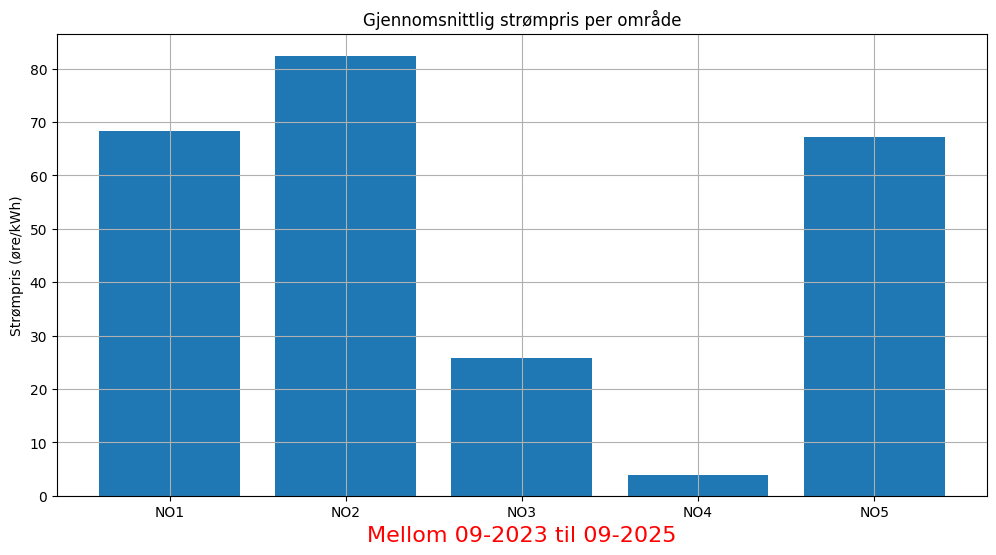

In [13]:
# Visualisering av gjennomsnittlig strømpris per område

plt.figure(figsize=(12, 6))
gjennomsnittPrisOmrader = df.groupby("area", observed=True)["Ører_per_kwh"].mean()
plt.bar(gjennomsnittPrisOmrader.index, gjennomsnittPrisOmrader.values)
plt.title("Gjennomsnittlig strømpris per område")
plt.xlabel("Mellom 09-2023 til 09-2025", color="red", font = {'size': 16})
plt.ylabel("Strømpris (øre/kWh)")
plt.grid(True)
plt.show()

In [14]:
# Vi konverterer til datetime og fjerner tidssoneinfo for enklere plotting
df['time_start'] = pd.to_datetime(df['time_start']).dt.tz_localize(None)
df["time_start"].head()

0   2025-09-25 22:00:00
1   2025-09-25 23:00:00
2   2025-09-26 00:00:00
3   2025-09-26 01:00:00
4   2025-09-26 02:00:00
Name: time_start, dtype: datetime64[ns]

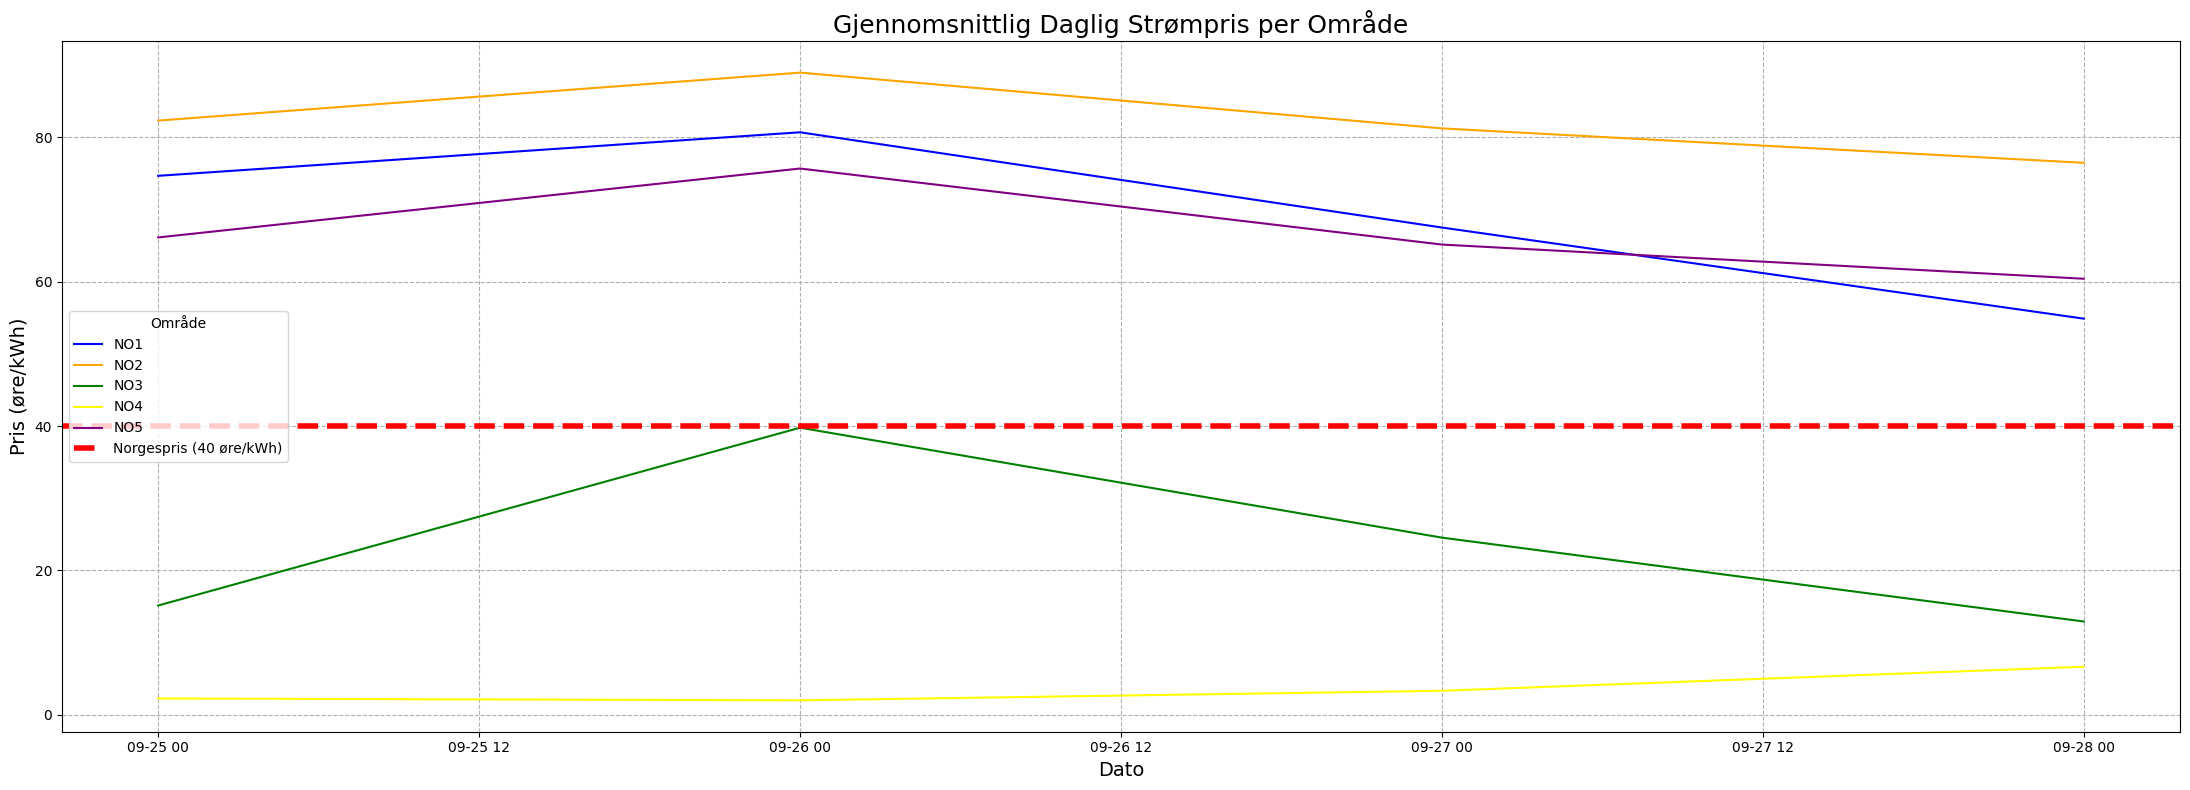

In [15]:
#Beregner daglig snittpris per område ---
#grupperer på dato og område, og regner ut gjennomsnittet
daglig_snitt = df.groupby([df['time_start'].dt.date, 'area'])['Ører_per_kwh'].mean().unstack()

# Linje diagram for daglig snittpris per område
fig, ax = plt.subplots(figsize=(22, 8)) # Oppretter figur og akser med en god størrelse

farger = ['blue', 'orange', 'green', 'yellow', 'purple']
daglig_snitt.plot(ax=ax, linewidth=1.5, color = farger) # Plotter dataene

# Legg til en horisontal linje for "Norgesprisen"
ax.axhline(40, color='red', linestyle='--', linewidth=4, label='Norgespris (40 øre/kWh)')



# --- 4. Tilpass og vis plottet ---
ax.set_title('Gjennomsnittlig Daglig Strømpris per Område', fontsize=18)
ax.set_xlabel('Dato', fontsize=14)
ax.set_ylabel('Pris (øre/kWh)', fontsize=14)
ax.legend(title='Område')
ax.grid(True, linestyle='--') # Legger til rutenett

plt.tight_layout() # Sørger for at alt får plass
plt.show()

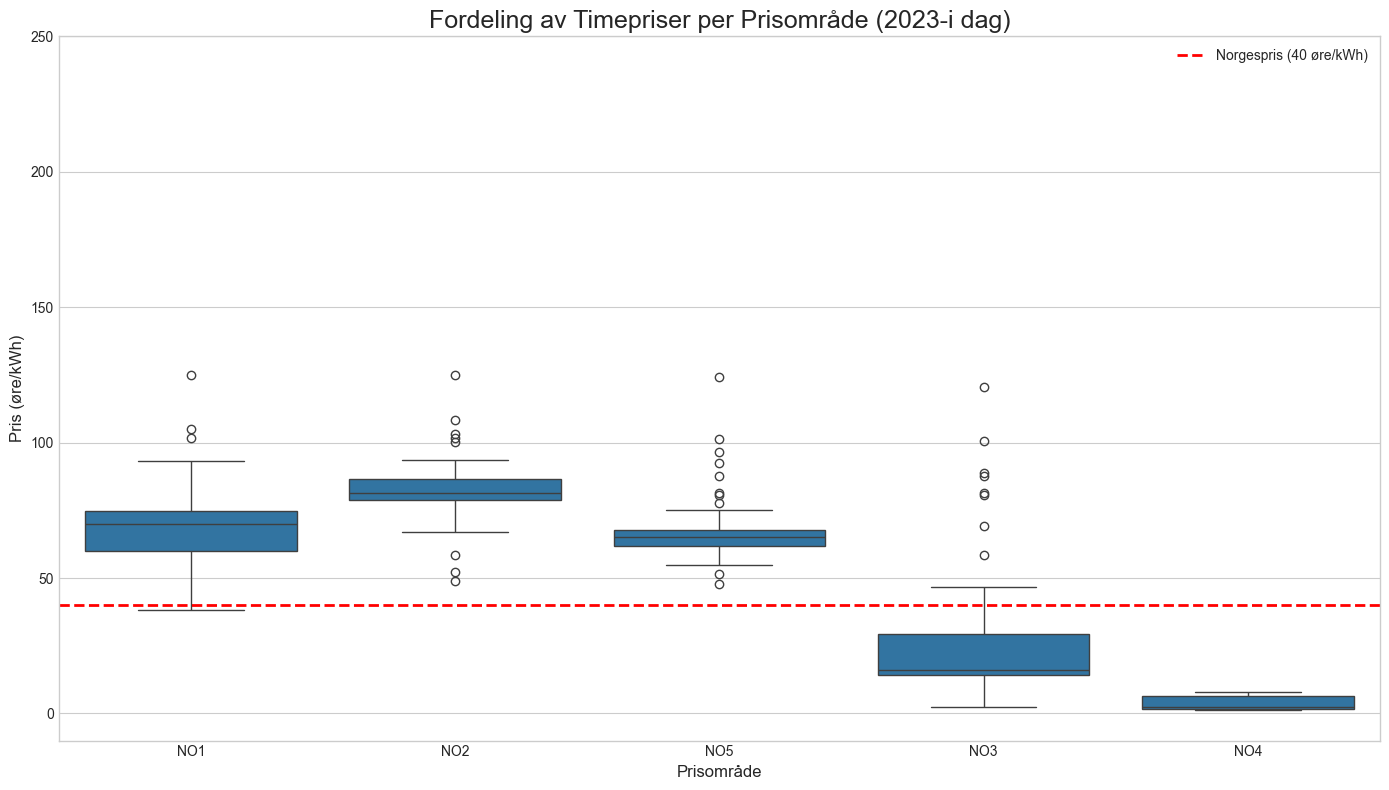

In [16]:
import seaborn as sns

# Last inn og forbered data ---
df = pd.read_csv("strompriser_2023_til_idag.csv", sep=';')
df['Ører_per_kwh'] = df['NOK_per_kWh'] * 100

# --- 2. Lag boksplottet ---
plt.style.use('seaborn-v0_8-whitegrid')
fig, ax = plt.subplots(figsize=(14, 8))

# Vi bruker seaborn-biblioteket for å lage et oversiktlig og pent boksplott.
sns.boxplot(x='area', y='Ører_per_kwh', data=df, ax=ax, 
            order=['NO1', 'NO2', 'NO5', 'NO3', 'NO4']) # Sorterer for bedre sammenligning

# Legg til en horisontal linje for "Norgesprisen"
ax.axhline(40, color='red', linestyle='--', linewidth=2, label='Norgespris (40 øre/kWh)')

# --- 3. Tilpass og vis plottet ---
ax.set_title('Fordeling av Timepriser per Prisområde (2023-i dag)', fontsize=18)
ax.set_xlabel('Prisområde', fontsize=12)
ax.set_ylabel('Pris (øre/kWh)', fontsize=12)
# Sett en grense på y-aksen for å "zoome inn" på den vanligste fordelingen
ax.set_ylim(-10, 250)
ax.legend()

plt.tight_layout()
plt.show()

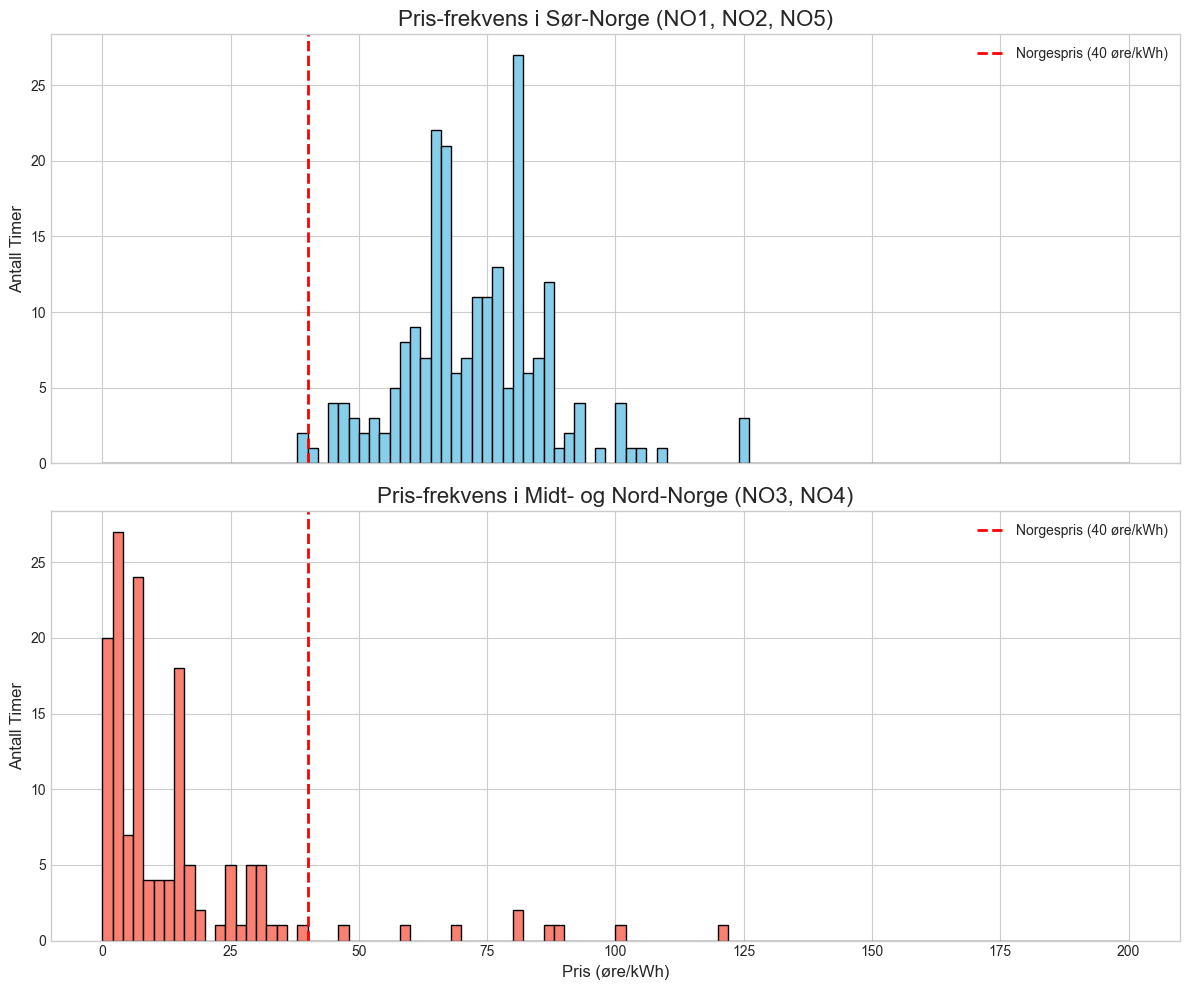

In [17]:
#Deler dataene i to grupper: sør og nord/midt slik at høye priser i nord ikke påvirker histogrammet for sør

pris_sor = df[df['area'].isin(['NO1', 'NO2', 'NO5'])]['Ører_per_kwh']
pris_nord = df[df['area'].isin(['NO3', 'NO4'])]['Ører_per_kwh']

# --- 2. Lag histogrammene ---
plt.style.use('_mpl-gallery')
# Oppretter en figur med to subplots (ett over det andre)
fig, (ax1, ax2) = plt.subplots(2, 1, figsize=(12, 10), sharex=True)

# Histogram for Sør-Norge (NO1, NO2, NO5)
ax1.hist(pris_sor, bins=100, range=(0, 200), color='skyblue', edgecolor='black')
ax1.set_title('Pris-frekvens i Sør-Norge (NO1, NO2, NO5)', fontsize=16)
ax1.set_ylabel('Antall Timer', fontsize=12)
ax1.axvline(40, color='red', linestyle='--', linewidth=2, label='Norgespris (40 øre/kWh)')
ax1.legend()

# Histogram for Midt- og Nord-Norge (NO3, NO4)
ax2.hist(pris_nord, bins=100, range=(0, 200), color='salmon', edgecolor='black')
ax2.set_title('Pris-frekvens i Midt- og Nord-Norge (NO3, NO4)', fontsize=16)
ax2.set_xlabel('Pris (øre/kWh)', fontsize=12)
ax2.set_ylabel('Antall Timer', fontsize=12)
ax2.axvline(40, color='red', linestyle='--', linewidth=2, label='Norgespris (40 øre/kWh)')
ax2.legend()

plt.tight_layout()
plt.show()

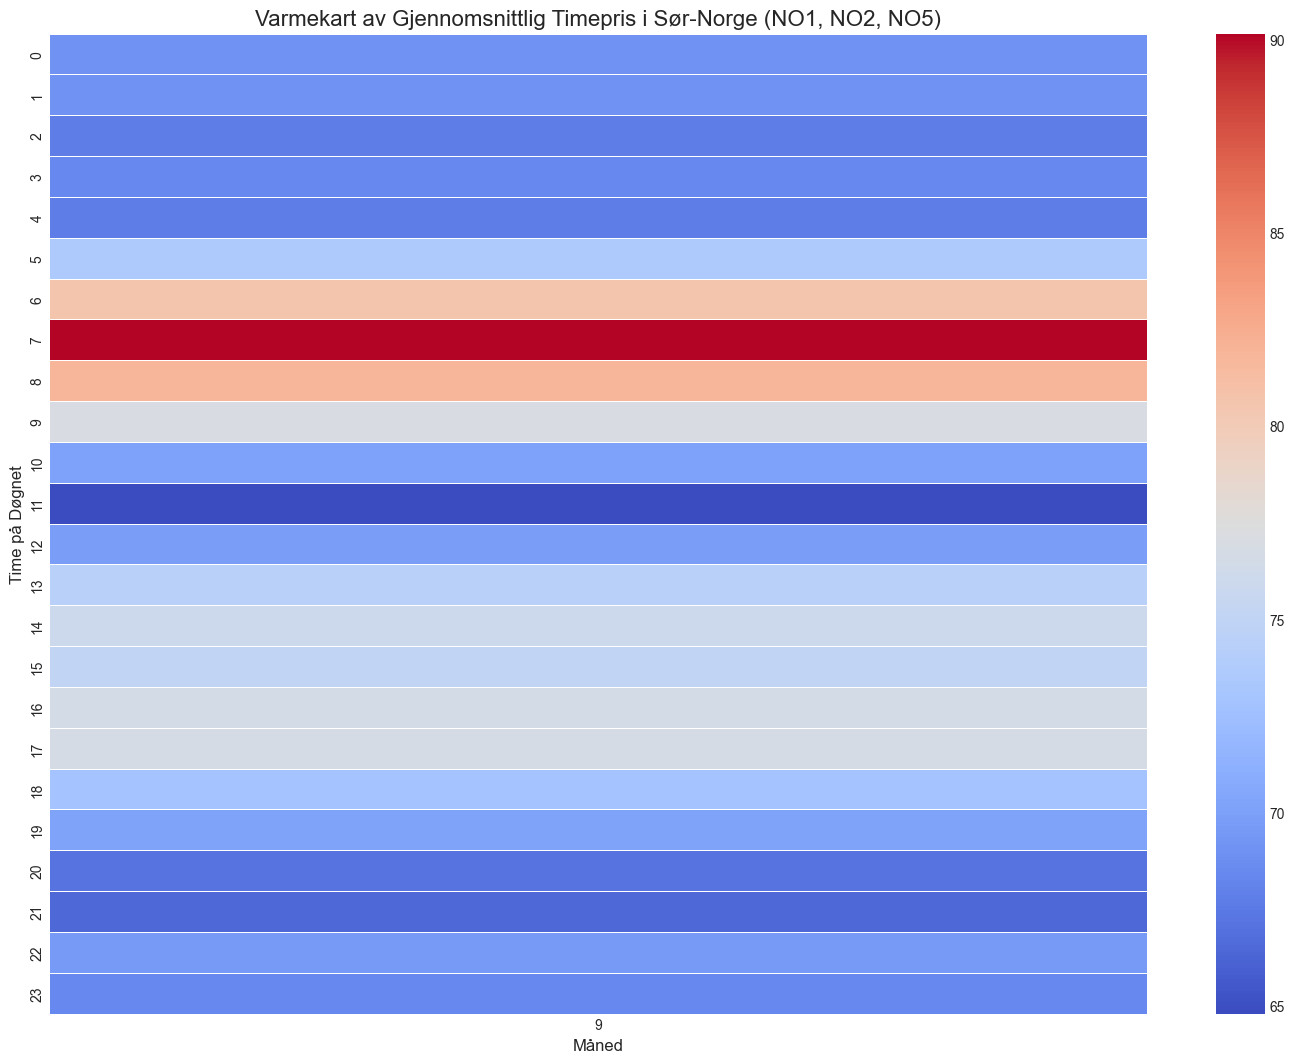

In [21]:
# --- 2. Trekk ut Måned og Time fra datotid-kolonnen ---
df['måned'] = df['time_start'].dt.month
df['time'] = df['time_start'].dt.hour

# Fokuser på Sør-Norge for et tydeligere mønster
df_sor = df[df['area'].isin(['NO1', 'NO2', 'NO5'])]

# --- 3. Lag en pivot-tabell ---
# Dette lager et rutenett med timer på y-aksen, måneder på x-aksen,
# og gjennomsnittsprisen som verdi i hver celle.
heatmap_data = df_sor.pivot_table(values='Ører_per_kwh',index='time',columns='måned')

# --- 4. Lag selve varmekartet ---
plt.figure(figsize=(14, 10))
sns.heatmap(
    heatmap_data,
    annot=False,  # Sett til True hvis du vil se tall i hver rute
    cmap='coolwarm',  # Et populært fargekart ('rocket', 'coolwarm' er andre alternativer)
    linewidths=0.5
)

plt.title('Varmekart av Gjennomsnittlig Timepris i Sør-Norge (NO1, NO2, NO5)', fontsize=16)
plt.xlabel('Måned', fontsize=12)
plt.ylabel('Time på Døgnet', fontsize=12)
plt.show()

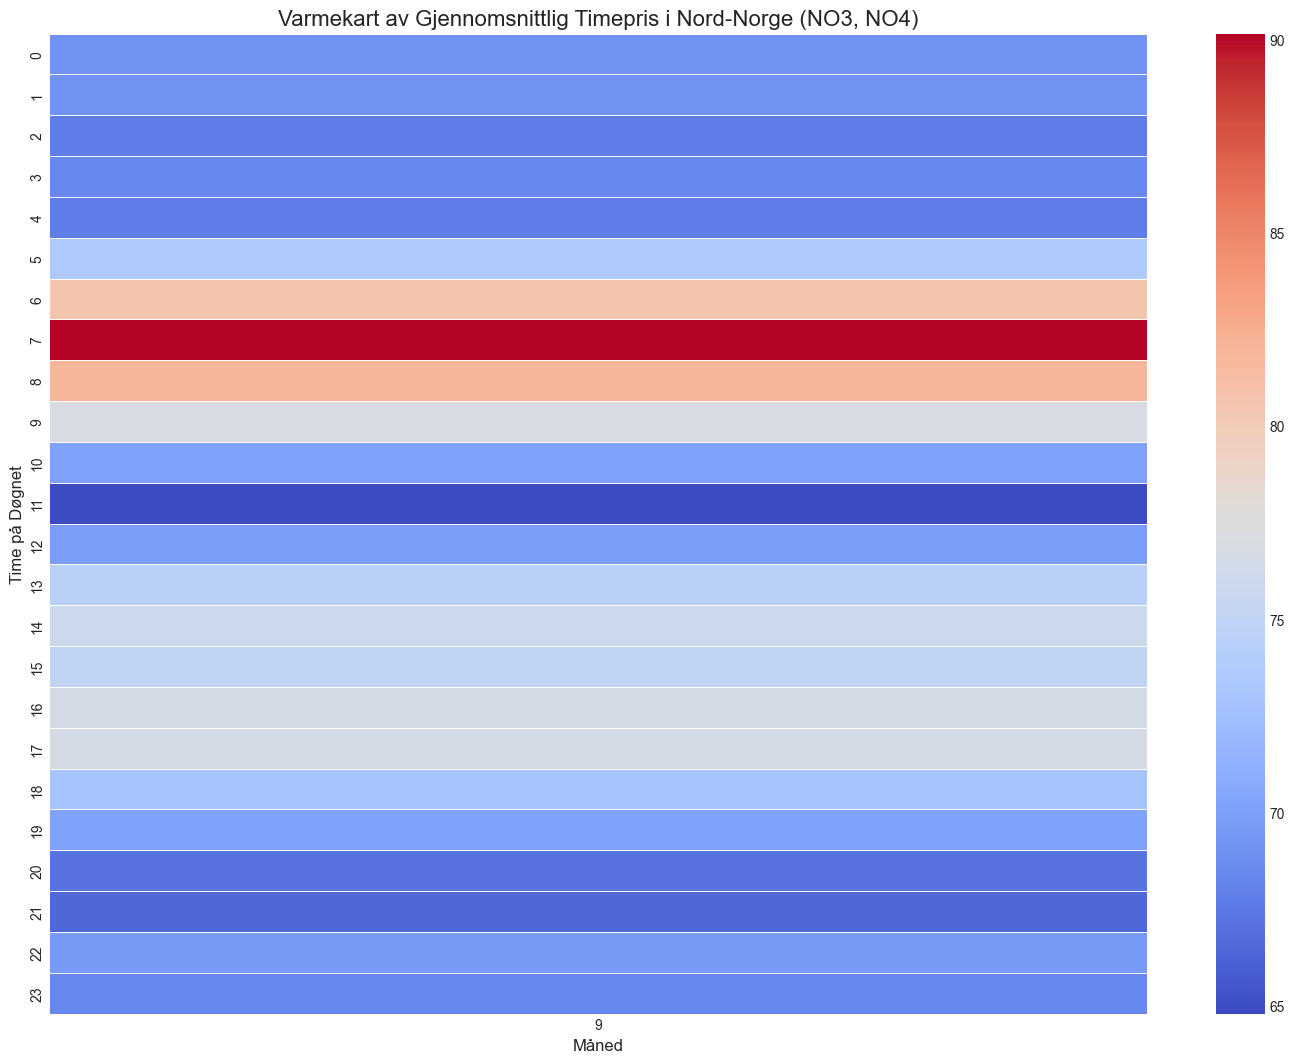

In [22]:
df_nor = df[df["area"].isin([("NO3", "NO4")])]

heatmap_data_nor = df_nor.pivot_table(values = "Ører_per_kwh", index = "time", columns= "måned")

plt.figure(figsize=(14, 10))
sns.heatmap(
    heatmap_data,
    annot=False,  # Sett til True hvis du vil se tall i hver rute
    cmap='coolwarm',  # Et populært fargekart ('rocket', 'coolwarm' er andre alternativer)
    linewidths=0.5
)

plt.title('Varmekart av Gjennomsnittlig Timepris i Nord-Norge (NO3, NO4)', fontsize=16)
plt.xlabel('Måned', fontsize=12)
plt.ylabel('Time på Døgnet', fontsize=12)
plt.show()



In [12]:
def finn_pris_omraade(postnummer):

    if 0 <= postnummer <= 3999:
        return "NO1"  # Østlandet
    elif 4000 <= postnummer <= 4999:
        return "NO2"  # Sørlandet
    elif 5000 <= postnummer <= 5999:
        return "NO5"  # Vestlandet
    elif 6000 <= postnummer <= 7999:
        return "NO3"  # Midt-Norge
    elif 8000 <= postnummer <= 9999:
        return "NO4"  # Nord-Norge
    else:
        return "Ugyldig postnummer"
    


In [24]:
df["pris_Ører_per_kwh_inkmva"]  =df["Ører_per_kwh"] * 1.25  # Legger til 25% MVA

df.head(-10) #Gir de siste 10 radene i datasettet


,NOK_per_kWh,EUR_per_kWh,EXR,time_start,time_end,area,Ører_per_kwh,måned,time,pris_Ører_per_kwh_inkmva
0,0.74803,0.06400,11.6880,2025-09-25 22:00:00+00:00,2025-09-25 23:00:00+00:00,NO1,74.803,9,22,93.50375
1,0.74569,0.06380,11.6880,2025-09-25 23:00:00+00:00,2025-09-26 00:00:00+00:00,NO1,74.569,9,23,93.21125
2,0.74745,0.06395,11.6880,2025-09-26 00:00:00+00:00,2025-09-26 01:00:00+00:00,NO1,74.745,9,0,93.43125
3,0.74476,0.06372,11.6880,2025-09-26 01:00:00+00:00,2025-09-26 02:00:00+00:00,NO1,74.476,9,1,93.09500
4,0.73997,0.06331,11.6880,2025-09-26 02:00:00+00:00,2025-09-26 03:00:00+00:00,NO1,73.997,9,2,92.49625
...,...,...,...,...,...,...,...,...,...,...
345,0.59524,0.05083,11.7105,2025-09-28 07:00:00+00:00,2025-09-28 08:00:00+00:00,NO5,59.524,9,7,74.40500
346,0.60930,0.05203,11.7105,2025-09-28 08:00:00+00:00,2025-09-28 09:00:00+00:00,NO5,60.930,9,8,76.16250
347,0.65918,0.05629,11.7105,2025-09-28 09:00:00+00:00,2025-09-28 10:00:00+00:00,NO5,65.918,9,9,82.39750
348,0.51456,0.04394,11.7105,2025-09-28 10:00:00+00:00,2025-09-28 11:00:00+00:00,NO5,51.456,9,10,64.32000


In [13]:
#Henter dagens priser for et gitt område   
def hent_dagens_priser(omrade):

    idag= pd.to_datetime(datetime.today())
    
    url = f"https://www.hvakosterstrommen.no/api/v1/prices/{idag.year}/{idag.month:02d}-{idag.day:02d}_{omrade}.json"


    response = requests.get(url, verify=False)
    dagens_data_json = response.json()
    return pd.DataFrame(dagens_data_json)

#viser dataframe for dagens priser for et gitt område
#Den er main fnksjonen som kjører programmet
def vis_dagen_priser_for_postnummer():
    
    postnummer = input("Skriv inn ditt postnummer (4 siffer): ")

# Validerer at postnummeret er 4 siffer og består kun av tall
    while not postnummer.isdigit() or len(postnummer) != 4:
        print("Ugyldig postnummer. Vennligst skriv inn et 4-sifret postnummer.")
        postnummer = input("Skriv inn ditt postnummer (4 siffer): ")

    else:
        postnummer = int(postnummer)
        prisomraade = finn_pris_omraade(postnummer)
        print(f"Ditt prisområde er: {prisomraade}")
        dagens_priser_df = hent_dagens_priser(prisomraade)
        dagens_priser_df["Ører_per_kwh"] = dagens_priser_df["NOK_per_kWh"] * 100
        dagens_priser_df["pris_Ører_per_kwh_inkmva"] = dagens_priser_df["Ører_per_kwh"] * 1.25
        print(dagens_priser_df)

vis_dagen_priser_for_postnummer()


Ditt prisområde er: NO1
    NOK_per_kWh  EUR_per_kWh      EXR                 time_start  \
0       0.53166      0.04540  11.7105  2025-09-29T00:00:00+02:00   
1       0.52334      0.04469  11.7105  2025-09-29T01:00:00+02:00   
2       0.50589      0.04320  11.7105  2025-09-29T02:00:00+02:00   
3       0.51924      0.04434  11.7105  2025-09-29T03:00:00+02:00   
4       0.52943      0.04521  11.7105  2025-09-29T04:00:00+02:00   
5       0.49828      0.04255  11.7105  2025-09-29T05:00:00+02:00   
6       0.43762      0.03737  11.7105  2025-09-29T06:00:00+02:00   
7       0.78531      0.06706  11.7105  2025-09-29T07:00:00+02:00   
8       0.78765      0.06726  11.7105  2025-09-29T08:00:00+02:00   
9       0.75111      0.06414  11.7105  2025-09-29T09:00:00+02:00   
10      0.74221      0.06338  11.7105  2025-09-29T10:00:00+02:00   
11      0.74690      0.06378  11.7105  2025-09-29T11:00:00+02:00   
12      0.73132      0.06245  11.7105  2025-09-29T12:00:00+02:00   
13      0.72371      0.0

c:\Users\bekir\AppData\Local\Programs\Python\Python313\Lib\site-packages\urllib3\connectionpool.py:1097: InsecureRequestWarning: Unverified HTTPS request is being made to host 'www.hvakosterstrommen.no'. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/latest/advanced-usage.html#tls-warnings
  warnings.warn(


In [14]:

omrader = ["NO1", "NO2", "NO3", "NO4", "NO5"]
slutt_dato = datetime.now() #Dagens dato
start_dato = slutt_dato - timedelta(days=3*365)  # Dagens dato - Siste tre år tar alltid siste 3 årets data

fullData_liste_3år = []

for dato in pd.date_range(start_dato, slutt_dato, freq="D"):
    for omrade in omrader:
        aar = dato.strftime("%Y")
        maaned = dato.strftime("%m")
        dag = dato.strftime("%d")
        url = f"https://www.hvakosterstrommen.no/api/v1/prices/{aar}/{maaned}-{dag}_{omrade}.json"
        try:
            response = requests.get(url, timeout=10, verify=False)
            if response.status_code == 200:
                dagligData = response.json()
                for timeData in dagligData:
                    ts = pd.to_datetime(timeData['time_start'])
                    # Hopp over fremtidige tidspunkter i siste dag
                    now = datetime.now(ts.tzinfo)
                    if ts.date() == now.date() and ts.hour > now.hour:
                        continue
                    timeData['area'] = omrade
                    fullData_liste_3år.append(timeData)
        except Exception as e:
            print(f"Feil for {url}: {e}")

df_3aar = pd.DataFrame(fullData_liste_3år)
df_3aar.to_csv("strompriser_siste_3_ar.csv", index=False)
print("Data lasted ned. Totalt data:", len(df_3aar))

c:\Users\bekir\AppData\Local\Programs\Python\Python313\Lib\site-packages\urllib3\connectionpool.py:1097: InsecureRequestWarning: Unverified HTTPS request is being made to host 'www.hvakosterstrommen.no'. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/latest/advanced-usage.html#tls-warnings
  warnings.warn(
c:\Users\bekir\AppData\Local\Programs\Python\Python313\Lib\site-packages\urllib3\connectionpool.py:1097: InsecureRequestWarning: Unverified HTTPS request is being made to host 'www.hvakosterstrommen.no'. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/latest/advanced-usage.html#tls-warnings
  warnings.warn(
c:\Users\bekir\AppData\Local\Programs\Python\Python313\Lib\site-packages\urllib3\connectionpool.py:1097: InsecureRequestWarning: Unverified HTTPS request is being made to host 'www.hvakosterstrommen.no'. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/e

KeyboardInterrupt: 

In [15]:
df_3aar = pd.read_csv("strompriser_siste_3_ar.csv")
df_3aar["Ører_per_kwh"] = df_3aar["NOK_per_kWh"] * 100  # Konverterer NOK/kWh til Øre/kWh
df_3aar["pris_Ører_per_kwh_inkmva"] = df_3aar["Ører_per_kwh"] * 1.25


df_3aar['time_start'] = pd.to_datetime(df_3aar['time_start'], utc=True)
df_3aar['time_end'] = pd.to_datetime(df_3aar['time_end'], utc=True)

df_3aar.head()

,NOK_per_kWh,EUR_per_kWh,EXR,time_start,time_end,area,Ører_per_kwh,pris_Ører_per_kwh_inkmva
0,3.45222,0.32618,10.5838,2022-09-29 22:00:00+00:00,2022-09-29 23:00:00+00:00,NO1,345.222,431.52750
1,3.28045,0.30995,10.5838,2022-09-29 23:00:00+00:00,2022-09-30 00:00:00+00:00,NO1,328.045,410.05625
2,3.25589,0.30763,10.5838,2022-09-30 00:00:00+00:00,2022-09-30 01:00:00+00:00,NO1,325.589,406.98625
3,3.24319,0.30643,10.5838,2022-09-30 01:00:00+00:00,2022-09-30 02:00:00+00:00,NO1,324.319,405.39875
4,3.24256,0.30637,10.5838,2022-09-30 02:00:00+00:00,2022-09-30 03:00:00+00:00,NO1,324.256,405.32000


In [17]:
def historisk_snitt_pris_omraade():
    postnummer = input("Skriv inn ditt postnummer (4 siffer): ")

# Validerer at postnummeret er 4 siffer og består kun av tall
    while not postnummer.isdigit() or len(postnummer) != 4:
        print("Ugyldig postnummer. Vennligst skriv inn et 4-sifret postnummer.")
        postnummer = input("Skriv inn ditt postnummer (4 siffer): ")

    else:
        postnummer = int(postnummer)
        prisomraade = finn_pris_omraade(postnummer)
        print(f"Ditt prisområde er: {prisomraade}")

    omrade_data = df_3aar[df_3aar['area'] == prisomraade]

    print(f" Snittpris i {prisomraade}: {omrade_data['pris_Ører_per_kwh_inkmva'].mean()} øre/kWh")


In [18]:
historisk_snitt_pris_omraade()

Ditt prisområde er: NO1
 Snittpris i NO1: 90.57400897474902 øre/kWh


Ditt prisområde er: NO1

Gjennomsnittlig strømpris per time i område NO1 (inkl. MVA):
time
0      75.207250
1      73.075167
2      72.001331
3      74.018012
4      80.550799
5      92.260355
6     104.102435
7     106.570730
8     100.405409
9      93.510623
10     87.414457
11     82.392737
12     81.246095
13     85.308750
14     92.247974
15    101.555032
16    110.625218
17    111.805202
18    107.500211
19    100.076597
20     93.804162
21     87.368221
22     82.080719
23     78.716930
Name: pris_Ører_per_kwh_inkmva, dtype: float64


C:\Users\bekir\AppData\Local\Temp\ipykernel_32676\758267272.py:17: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  omrade_dataTime['time'] = omrade_dataTime['time_start'].dt.hour


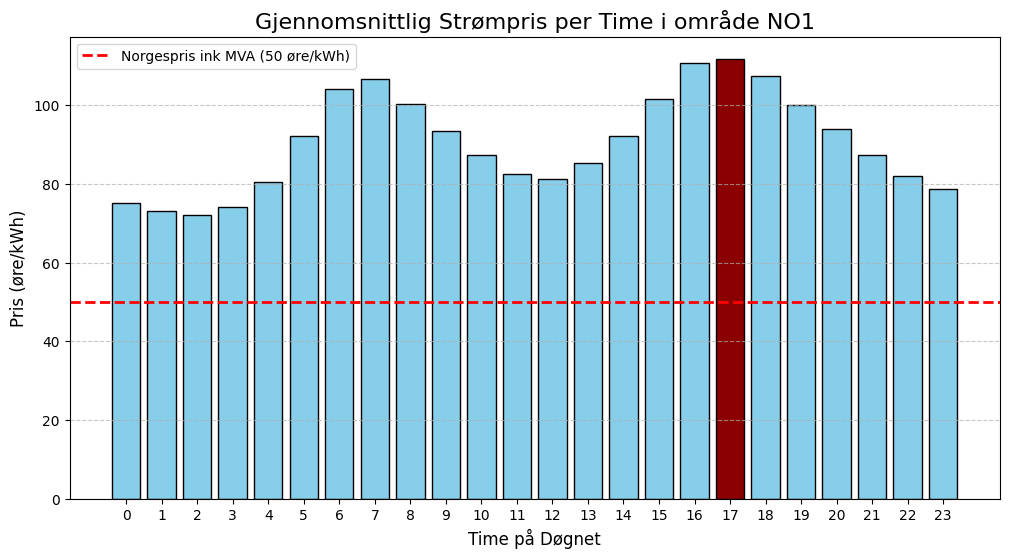

In [19]:
def hent_snittpris_per_time():
    postnummer = input("Skriv inn ditt postnummer (4 siffer): ")

# Validerer at postnummeret er 4 siffer og består kun av tall
    while not postnummer.isdigit() or len(postnummer) != 4:
        print("Ugyldig postnummer. Vennligst skriv inn et 4-sifret postnummer.")
        postnummer = input("Skriv inn ditt postnummer (4 siffer): ")

    else:
        postnummer = int(postnummer)
        prisomraade = finn_pris_omraade(postnummer)
        print(f"Ditt prisområde er: {prisomraade}")

    omrade_dataTime = df_3aar[df_3aar['area'] == prisomraade]

    #Trekk ut time fra datotid-kolonnen
    omrade_dataTime['time'] = omrade_dataTime['time_start'].dt.hour

    # Grupper på time og beregn snittprisen
    snittpris_per_time = omrade_dataTime.groupby('time')['pris_Ører_per_kwh_inkmva'].mean()

    print(f"\nGjennomsnittlig strømpris per time i område {prisomraade} (inkl. MVA):")
    print(snittpris_per_time)

    fig, ax = plt.subplots(figsize=(12, 6))

    # 4. Lag søylediagrammet
    ax.bar(snittpris_per_time.index, snittpris_per_time.values, color='skyblue', edgecolor='black')

    # 5. Sett titler og etiketter FØR plt.show()
    ax.set_title(f"Gjennomsnittlig Strømpris per Time i område {prisomraade}", fontsize=16)
    ax.set_xlabel("Time på Døgnet", fontsize=12)
    ax.set_ylabel("Pris (øre/kWh)", fontsize=12)
    ax.grid(axis='y', linestyle='--', alpha=0.7)
    ax.axhline(50, color='red', linestyle='--', linewidth=2, label='Norgespris ink MVA (50 øre/kWh)')
    # Setter x-aksen til å vise alle timene
    ax.set_xticks(np.arange(0, 24, 1))

    #For å endre fargen til høyeste bar
    ax.patches[snittpris_per_time.idxmax()].set_facecolor('darkred')
    ax.legend()


    # 6. Vis det ferdige plottet
    plt.show()

hent_snittpris_per_time()

In [20]:
df_3aar.info() #Jeg sjekker datasettet for å begynne å prediktere fretidige priser

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 131480 entries, 0 to 131479
Data columns (total 8 columns):
 #   Column                    Non-Null Count   Dtype              
---  ------                    --------------   -----              
 0   NOK_per_kWh               131480 non-null  float64            
 1   EUR_per_kWh               131480 non-null  float64            
 2   EXR                       131480 non-null  float64            
 3   time_start                131480 non-null  datetime64[ns, UTC]
 4   time_end                  131480 non-null  datetime64[ns, UTC]
 5   area                      131480 non-null  object             
 6   Ører_per_kwh              131480 non-null  float64            
 7   pris_Ører_per_kwh_inkmva  131480 non-null  float64            
dtypes: datetime64[ns, UTC](2), float64(5), object(1)
memory usage: 8.0+ MB


In [21]:
postnummer = input("Skriv inn ditt postnummer (4 siffer): ")


# Validerer at postnummeret er 4 siffer og består kun av tall
while not postnummer.isdigit() or len(postnummer) != 4:
    print("Ugyldig postnummer. Vennligst skriv inn et 4-sifret postnummer.")
    postnummer = input("Skriv inn ditt postnummer (4 siffer): ")
else:
    omrade = finn_pris_omraade(int(postnummer))



In [22]:


df_3aar['Ører_per_kwh'] = df_3aar['NOK_per_kWh'] * 100
df_3aar['time_start'] = pd.to_datetime(df_3aar['time_start'])

df_gjennomsnitlig_maned = df_3aar[df_3aar['area'] == omrade]

# Lager et nytt DataFrame med månedlige gjennomsnitt
df_manedlig = df_gjennomsnitlig_maned.set_index('time_start')['pris_Ører_per_kwh_inkmva'].resample('ME').mean().to_frame()

df_manedlig.tail(40) #Viser de siste 40 radene i datasettet

,pris_Ører_per_kwh_inkmva
time_start,
2022-09-30 00:00:00+00:00,345.267981
2022-10-31 00:00:00+00:00,164.567109
2022-11-30 00:00:00+00:00,140.942377
2022-12-31 00:00:00+00:00,335.047137
2023-01-31 00:00:00+00:00,158.132162
2023-02-28 00:00:00+00:00,143.622089
2023-03-31 00:00:00+00:00,140.443384
2023-04-30 00:00:00+00:00,138.522582
2023-05-31 00:00:00+00:00,97.976673


In [23]:
print(len(df_manedlig)) #Sjekker lengden på datasettet

37


Predikert strømpris om 4 måneder: 84.65 øre/kWh inkl. mva


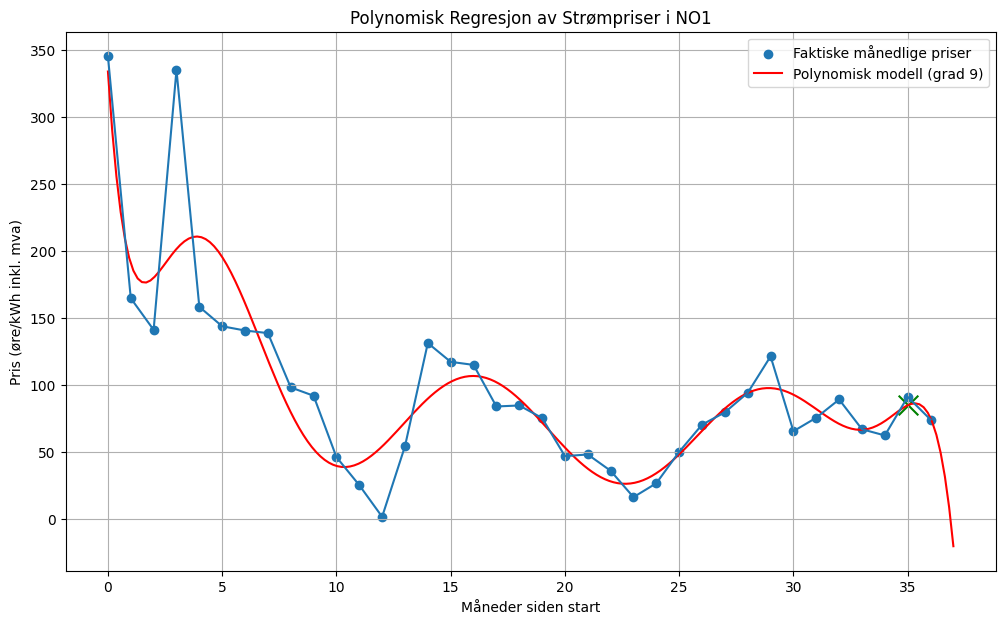

                           pris_Ører_per_kwh_inkmva  tids_indeks
time_start                                                      
2022-09-30 00:00:00+00:00                345.267981            0
2022-10-31 00:00:00+00:00                164.567109            1
2022-11-30 00:00:00+00:00                140.942377            2
2022-12-31 00:00:00+00:00                335.047137            3
2023-01-31 00:00:00+00:00                158.132162            4


In [29]:
df_manedlig['tids_indeks'] = np.arange(len(df_manedlig))

x = df_manedlig["tids_indeks"]
y = df_manedlig["pris_Ører_per_kwh_inkmva"]

#Jeg vil bruke polynomisk regresjon av grad 5 for å modellere dataene
grad = 9
mymodel= np.poly1d(np.polyfit(x, y, grad))

# Lag en jevn linje for å tegne kurven til modellen
myline = np.linspace(x.min(), x.max()+1, 200)

plt.figure(figsize=(12, 7))
# Plot de originale datapunktene
plt.scatter(x, y, label='Faktiske månedlige priser')

plt.plot(myline, mymodel(myline), color='red', label=f'Polynomisk modell (grad {grad})')

plt.plot(x,y)


plt.title('Polynomisk Regresjon av Strømpriser i NO1')
plt.xlabel('Måneder siden start')
plt.ylabel('Pris (øre/kWh inkl. mva)')
plt.legend()
plt.grid(True)


index= int(input("Skriv inn måned (0-39): "))
om_4mnd = mymodel(index)
print(f"Predikert strømpris om 4 måneder: {om_4mnd:.2f} øre/kWh inkl. mva")
plt.scatter(index, om_4mnd,marker="x",s=200,c="g")
plt.show()

print(df_manedlig.head())

Prediksjon model fungerte ikke som jeg forventet, som ble synlig i diagramet etter 35 måneder blir det drastisk fall. Da bestemte jeg å fjerne dataer som kan bli outliers.

In [30]:
df_manedlig.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 37 entries, 2022-09-30 00:00:00+00:00 to 2025-09-30 00:00:00+00:00
Freq: ME
Data columns (total 2 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   pris_Ører_per_kwh_inkmva  37 non-null     float64
 1   tids_indeks               37 non-null     int64  
dtypes: float64(1), int64(1)
memory usage: 888.0 bytes


In [34]:
df_manedlig.describe()

,pris_Ører_per_kwh_inkmva,tids_indeks,z_score
count,37.000000,37.000000,0.0
mean,97.274588,18.000000,NaN
std,71.523208,10.824355,NaN
min,1.362000,0.000000,NaN
25%,54.027727,9.000000,NaN
50%,83.732351,18.000000,NaN
75%,121.146860,27.000000,NaN
max,345.267981,36.000000,NaN


In [ ]:
#Finner z score for å finne outliers

df_manedlig["z_score"] = (df_manedlig["pris_Ører_per_kwh_inkmva"]-97.274588)/ 71.523208
df_manedlig_renset = df_manedlig[df_manedlig["z_score"].abs() <= 3]
print(df_manedlig_renset)

                           pris_Ører_per_kwh_inkmva  tids_indeks   z_score
time_start                                                                
2022-10-31 00:00:00+00:00                164.567109            1  0.940849
2022-11-30 00:00:00+00:00                140.942377            2  0.610540
2023-01-31 00:00:00+00:00                158.132162            4  0.850879
2023-02-28 00:00:00+00:00                143.622089            5  0.648006
2023-03-31 00:00:00+00:00                140.443384            6  0.603563
2023-04-30 00:00:00+00:00                138.522582            7  0.576708
2023-05-31 00:00:00+00:00                 97.976673            8  0.009816
2023-06-30 00:00:00+00:00                 91.736849            9 -0.077426
2023-07-31 00:00:00+00:00                 45.956967           10 -0.717496
2023-08-31 00:00:00+00:00                 24.973891           11 -1.010870
2023-09-30 00:00:00+00:00                  1.362000           12 -1.341000
2023-10-31 00:00:00+00:00

In [ ]:
#Jeg sjekket lengden og fant at to data ble slettet
print(len(df_manedlig_renset))

35


Predikert strømpris om 4 måneder: 69.42 øre/kWh inkl. mva


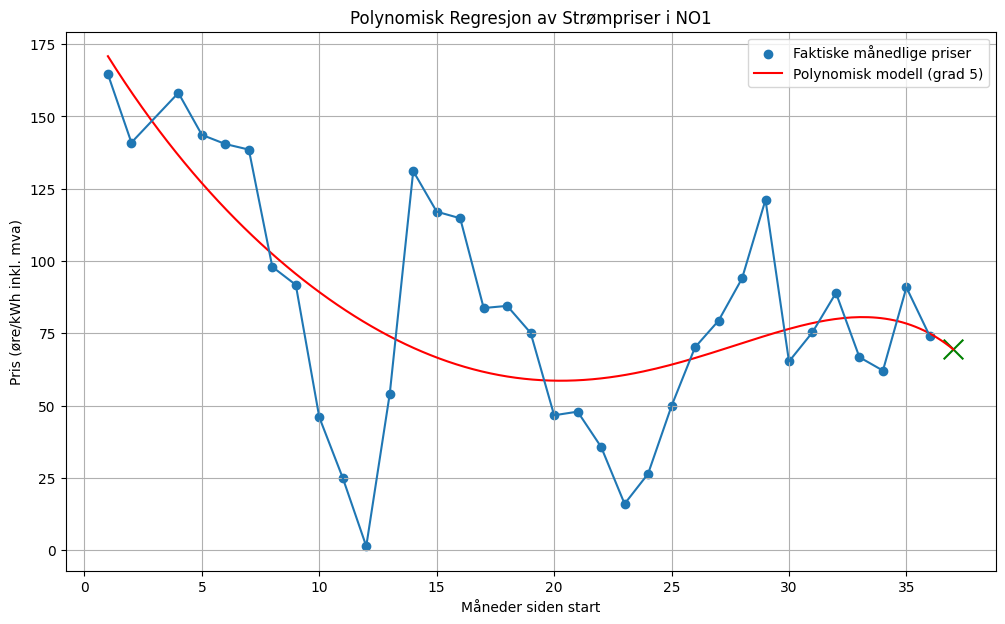

In [52]:

x = df_manedlig_renset["tids_indeks"]
y = df_manedlig_renset["pris_Ører_per_kwh_inkmva"]

#Jeg vil bruke polynomisk regresjon av grad 5 for å modellere dataene
grad = 5
mymodel= np.poly1d(np.polyfit(x, y, grad))

# Lag en jevn linje for å tegne kurven til modellen
myline = np.linspace(x.min(), x.max()+1, 200)

plt.figure(figsize=(12, 7))
# Plot de originale datapunktene
plt.scatter(x, y, label='Faktiske månedlige priser')

plt.plot(myline, mymodel(myline), color='red', label=f'Polynomisk modell (grad {grad})')

plt.plot(x,y)


plt.title('Polynomisk Regresjon av Strømpriser i NO1')
plt.xlabel('Måneder siden start')
plt.ylabel('Pris (øre/kWh inkl. mva)')
plt.legend()

plt.grid(True)


index= int(input("Skriv inn måned (0-39): "))
om_4mnd = mymodel(index)
print(f"Predikert strømpris om 4 måneder: {om_4mnd:.2f} øre/kWh inkl. mva")
plt.scatter(index, om_4mnd,marker="x",s=200,c="g")
plt.show()
